In [1]:
from GRpy.Tensor import *
from GRpy.Christoffel import *
from GRpy.Riemann import *
from sympy import *
init_printing(use_unicode=True)

# Sphere:

Metric:
$$
g_{ij}(\theta, \phi)=
\begin{bmatrix}
a^2 & 0\\
 0 & a^2 \sin^2(\theta)
\end{bmatrix},
$$
with $a$ the radius of the sphere.

In [2]:
a = Symbol('a')
r = Symbol('r')
theta = Symbol('theta')
phi = Symbol('phi')

In [3]:
gij = Metric((theta, phi))
gij[-0,-0] = a**2
gij[-0,-1] = 0
gij[-1,-0] = 0
gij[-1,-1] = (a**2)*(sin(theta))**2

#gij_det = gij.determinant
gij_inv = gij.invert()#
christoffel = Christoffel(gij)
riemann = Riemann(christoffel)
riemann_tensor = riemann.R_tensor#
riemann_cov = riemann.Riemann_cov#
riemann_cont = riemann.Riemann_cont#
riemann_par = riemann.Riemann_par
ricci = Ricci(riemann)
scalar = Scalar(gij,ricci, riemann)
scalar_ricci = scalar.Scr_Ricci#
Kretschmann_scalar = scalar.Scr_Kretsch#
Other_scalar = scalar.Scr_Other#
einstein = Einstein(gij, ricci, scalar_ricci)

In [4]:
#gij.determinant

In [5]:
gij.__str__()

The non-zero components of g_{ab} are:
(-1, -1) : a**2*sin(theta)**2
(0, 0) : a**2


In [6]:
gij.inverse.__str__()

The non-zero components of g_inv are:
(0, 0) : a**(-2)
(1, 1) : 1/(a**2*sin(theta)**2)


In [7]:
christoffel.__str__()

The non-zero components of Gamma^{a}_{bc} are:
(0, -1, -1) : -sin(theta)*cos(theta)
(1, -1, 0) : cos(theta)/sin(theta)
(1, 0, -1) : cos(theta)/sin(theta)


In [8]:
riemann_tensor.__str__()

The non-zero components of R^{a}_{bcd} are:
(0, -1, -1, 0) : -sin(theta)**2
(0, -1, 0, -1) : sin(theta)**2
(1, 0, -1, 0) : 1
(1, 0, 0, -1) : -1


In [9]:
riemann_cov.__str__()

The non-zero components of R_{abcd} are:
(-1, 0, -1, 0) : a**2*sin(theta)**2
(-1, 0, 0, -1) : -a**2*sin(theta)**2
(0, -1, -1, 0) : -a**2*sin(theta)**2
(0, -1, 0, -1) : a**2*sin(theta)**2


In [10]:
riemann_cont.__str__()

The non-zero components of R^{abcd} are:
(0, 1, 0, 1) : 1/(a**6*sin(theta)**2)
(0, 1, 1, 0) : -1/(a**6*sin(theta)**2)
(1, 0, 0, 1) : -1/(a**6*sin(theta)**2)
(1, 0, 1, 0) : 1/(a**6*sin(theta)**2)


In [11]:
riemann_par.__str__()

The non-zero components of R^{ab}_{cd} are:
(0, 1, -1, 0) : -1/a**2
(0, 1, 0, -1) : a**(-2)
(1, 0, -1, 0) : a**(-2)
(1, 0, 0, -1) : -1/a**2


In [12]:
ricci.__str__()

The non-zero components of R_{ab} are:
(-1, -1) : sin(theta)**2
(0, 0) : 1


In [13]:
scalar.__str__()

The Ricci scalar is:
2/a**2
The Kretschmann scalar is:
4/a**4
The Other scalar is:
16/a**6


In [14]:
einstein.__str__()

All the components of G_{ab} are 0!


# Verifying:

Consider the following properties for spaces with constant curvature:

$$ R_{ijkl}=\alpha (g_{ik}g_{jl}-g_{jk}g_{il}),$$
$$ g_{ij}= \frac{R_{ij}}{\alpha(d-1)},$$

Then 
$$\alpha = R/(d(d-1)).$$

As $d=2$ and $R =2/a^2$, then $\alpha =1/a^2$.

In [15]:
alpha = 1/(a**2)

In [16]:
for i in range(2):
    for j in range(2):
        for m in range(2):
            for l in range(2):
                cosa = gij.components[-i,-m]*gij.components[-j,-l]-gij.components[-j,-m]*gij.components[-i,-l]
                print '(%d,%d,%d,%d)'%(i,j,m,l), cancel(riemann.components[-i,-j,-m,-l])==simplify(alpha*cosa)

(0,0,0,0) True
(0,0,0,1) True
(0,0,1,0) True
(0,0,1,1) True
(0,1,0,0) True
(0,1,0,1) True
(0,1,1,0) True
(0,1,1,1) True
(1,0,0,0) True
(1,0,0,1) True
(1,0,1,0) True
(1,0,1,1) True
(1,1,0,0) True
(1,1,0,1) True
(1,1,1,0) True
(1,1,1,1) True


In [17]:
for i in range(2):
    for j in range(2):
        print '(%d,%d)'%(i,j), cancel(gij.components[-i,-j])==simplify(ricci.components[-i,-j]/(alpha))

(0,0) True
(0,1) True
(1,0) True
(1,1) True


# Killing Equation

In [18]:
A0 = Function('A0')(theta,phi)
A1 = Function('A1')(theta,phi)

In [19]:
A = XI((theta,phi))
A[0] = A0
A[1] = A1

In [20]:
Ke = Killing_Equation(A,gij)

In [21]:
Ke.__str__()

The non-zero components of K_eq_{ab} are:
(-1, -1) : a**2*A0(theta, phi)*sin(2*theta) - a**2*cos(2*theta)*Derivative(A1(theta, phi), phi) + a**2*Derivative(A1(theta, phi), phi)
(-1, 0) : a**2*sin(theta)**2*Derivative(A1(theta, phi), theta) + a**2*Derivative(A0(theta, phi), phi)
(0, -1) : a**2*sin(theta)**2*Derivative(A1(theta, phi), theta) + a**2*Derivative(A0(theta, phi), phi)
(0, 0) : 2*a**2*Derivative(A0(theta, phi), theta)


# Checking Killing equations:

$$\vec{\xi}_{1}(\theta,\phi)=(\sin(\phi),\cot(\theta)\cos(\theta)),$$
$$\vec{\xi}_{2}(\theta,\phi)=(\cos(\phi),-\cot(\theta)\sin(\theta)),$$
$$\vec{\xi}_{3}(\theta,\phi)=(0,1).$$

In [22]:
xi1 = XI((theta,phi))
xi2 = XI((theta,phi))
xi3 = XI((theta,phi))
xi1[0] = sin(phi)
xi1[1] = cot(theta)*cos(phi)
xi2[0] = cos(phi)
xi2[1] = -cot(theta)*sin(phi)
xi3[0] = 0
xi3[1] = 1

In [23]:
Ke1 = Killing_Equation(xi1,gij)
Ke2 = Killing_Equation(xi2,gij)
Ke3 = Killing_Equation(xi3,gij)

In [24]:
Ke1.__str__()
Ke2.__str__()
Ke3.__str__()

All the components of K_eq_{ab} are 0!
All the components of K_eq_{ab} are 0!
All the components of K_eq_{ab} are 0!


# Covariant derivative:

In [25]:
A0 = Function('A0')(theta,phi)
A1 = Function('A1')(theta,phi)

In [26]:
A = XI((theta,phi))

In [27]:
A[0]= A0
A[1]= A1

In [28]:
Cov_der = Covariant_Derivative(A, christoffel)

In [29]:
Cov_der.__str__()

The non-zero components of nabla_{a} are:
(-1, 0) : -A1(theta, phi)*sin(2*theta)/2 + Derivative(A0(theta, phi), phi)
(-1, 1) : (A0(theta, phi) + tan(theta)*Derivative(A1(theta, phi), phi))/tan(theta)
(0, 0) : Derivative(A0(theta, phi), theta)
(0, 1) : (A1(theta, phi) + tan(theta)*Derivative(A1(theta, phi), theta))/tan(theta)


# Geodesic equation:

In [30]:
Geo_eq = Geodesic_Equation(christoffel)

In [31]:
Geo_eq.__str__()

The non-zero components of geo_eq^{a} are:
0 : -sin(2*theta)*Derivative(phi(l), l)**2/2 + Derivative(theta(l), l, l)
1 : (tan(theta)*Derivative(phi(l), l, l) + 2*Derivative(phi(l), l)*Derivative(theta(l), l))/tan(theta)


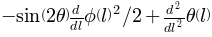

In [32]:
Geo_eq.components[0]

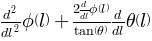

In [33]:
Geo_eq.components[1]

In [34]:
Geo_eq.x_up.components[0]

In [35]:
Geo_eq.x_up.components[1]

In [36]:
Geo_eq.x_down.components[-0]

In [37]:
Geo_eq.x_down.components[-1]